# 👏 Problema 1: Simulación de Onda Sonora - Análisis Completo

Barbara Chassoul  
UCR, FS1039 - Tarea Programada I

**Git**: [FS1039-T1](https://github.com/bchassoul/FS1039-T1)


## 📋 Resumen del Problema

Este problema simula la propagación de ondas sonoras en un medio unidimensional. El sistema modela el aire en una "habitación" unidimensional con paredes reflectivas.

### 🔬 Configuración Física
- **Ecuaciones hidrodinámicas**: ∂ρ/∂t + ∇⋅(ρv) = 0, ∂v/∂t + (v⋅∇)v = -1/ρ ∇P
- **Condiciones iniciales**: Perturbación tipo delta en el centro (como aplaudir)
- **Condiciones de frontera**: Reflectivas (paredes de la habitación)
- **Ecuación de estado**: P = c_s²ρ con c_s = 1


## 🛠️ Contenido de utils.py


In [26]:
# Mostrar el contenido de utils.py
print("=" * 80)
with open('../src/utils.py', 'r', encoding='utf-8') as f:
    print(f.read())


#!/usr/bin/env python3
"""
🛠️ Utilidades

Funciones auxiliares compartidas entre los scripts de simulación.
"""
import re
import glob
import subprocess
import shutil
from pathlib import Path


def clean_results_directory(problem_name):
    """
    Limpia los resultados anteriores de un problema específico.
    
    Args:
        problem_name (str): Nombre del problema ('problema1' o 'problema2')
    """
    results_dir = Path(f'../results/{problem_name}')
    if results_dir.exists():
        print(f"✨ Limpiando resultados anteriores del {problem_name.title()}...")
        shutil.rmtree(results_dir)
        print("✨ Resultados anteriores eliminados")
    else:
        print(f"✨ No hay resultados del {problem_name.title()} para limpiar")
    
    # Crear directorio vacío
    results_dir.mkdir(parents=True, exist_ok=True)


def discover_times(pattern):
    """Descubre los tiempos disponibles en archivos de simulación PLUTO"""
    times = []
    rx = re.compile(r'_(\d+)\.npy$')
    for fp 

## 🛠️ Contenido de solucion_problema1.py


In [27]:
# Mostrar el contenido de solucion_problema1.py
print("=" * 80)
with open('../src/solucion_problema1.py', 'r', encoding='utf-8') as f:
    print(f.read())


#!/usr/bin/env python3
"""
👏 Problema 1: Simulación de Onda Sonora

🎯 Tareas Implementadas:
1. Visualización de densidad ρ(x,t) con rango fijo para comparación
2. Creación de video mostrando la evolución temporal
3. Análisis de componentes de velocidad (vx, vy, vz)
4. Cálculo y visualización de presión P = c_s²ρ
5. Respuestas conceptuales sobre reflexión en paredes

📁 Datos requeridos: data/soundwave-data/
🔥 Resultados: results/problema1/

Ejecutar desde src/: python solucion_problema1.py
"""
import math
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from utils import clean_results_directory, discover_times, ensure_dir, create_video_and_gif

# ---------- Utilidades ----------

def fixed_ylim(values, pad_frac=0.05):
    vmin = float(np.min(values))
    vmax = float(np.max(values))
    if np.isclose(vmin, vmax):
        # Evitar rango cero
        delta = 1.0 if vmax == 0 else abs(vmax)*0.1
        vmin -= delta
        vmax += delta
    pad = (vmax - vmin) 

In [28]:
# Ejecutar el script principal del Problema 1
import sys
import os
sys.path.append('../src')

# Ejecutar el script principal
exec(open('../src/solucion_problema1.py').read())

print("✨ Análisis del Problema 1 completado")


✨ Limpiando resultados anteriores del Problema1...
✨ Resultados anteriores eliminados
✨ Generando 21 fotogramas de densidad...
✨ Creando video MP4 y GIF de densidad...
✨ Video creado: ../results/problema1/density.mp4
✨ GIF creado: ../results/problema1/density.gif
✨ Figuras de velocidad guardadas como velocities_t00.png y velocities_t20.png
✨ Figura de presión guardada como pressure_t20.png
🔥 Archivos generados en results/problema1/:
 - Videos: density.mp4 y density.gif
 - Análisis: velocities_t{tA:02d}.png, velocities_t{tB:02d}.png, pressure_t{tP:02d}.png
 - Fotogramas: frames_density/*.png
✨ Análisis del Problema 1 completado


## ✨ Respuestas a las Preguntas Conceptuales

### 1. ¿Qué pasa cuando la onda llega a las paredes?

**Respuesta:**
Con condiciones de frontera reflectivas, la onda se refleja invirtiendo el signo de la velocidad normal en la pared (no hay flujo saliendo) y generando interferencia con la onda incidente. Dependiendo del tiempo de viaje, pueden formarse patrones tipo estacionarios en el dominio (ecos internos).

El video de densidad donde se observa cómo la perturbación se propaga hacia las paredes y se refleja.


In [29]:
# Mostrar el video de densidad
from IPython.display import HTML, display

video_path = '../results/problema1/density.gif'
if os.path.exists(video_path):
    display(HTML(f'<img src="{video_path}" alt="Video de Densidad" style="width: 100%; max-width: 600px;">'))
else:
    print("❌ Video no encontrado.")


### 2. Si estás en el centro de la caja, ¿qué escucharías?

**Respuesta:**
Partimos de una perturbación localizada en el centro: se separa en dos frentes que viajan a ambos lados y regresan por reflexión. En el centro se oiría una secuencia de pulsos (el original y ecos periódicos) separados por Δt ≈ 2L/cs (ida y vuelta), con cs = 1; la amplitud tiende a variar por superposición e interferencia.

El análisis de velocidades muestra la evolución temporal del movimiento en el centro.


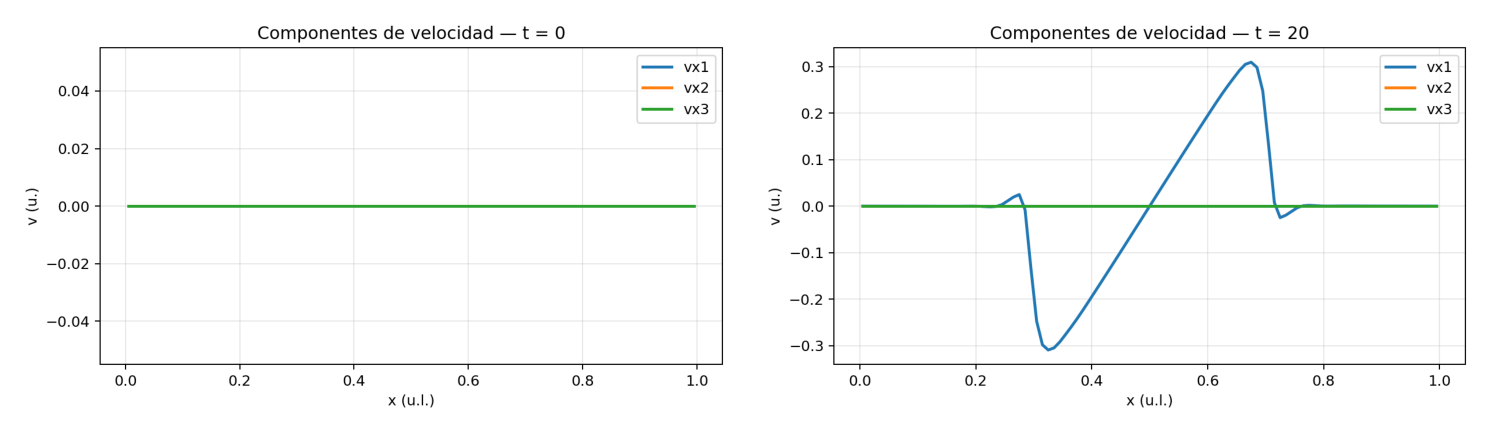

In [30]:
# Mostrar análisis de velocidades
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Condiciones iniciales (t=0)
img1_path = '../results/problema1/velocities_t00.png'
if os.path.exists(img1_path):
    img1 = mpimg.imread(img1_path)
    ax1.imshow(img1)
    ax1.axis('off')
else:
    ax1.text(0.5, 0.5, 'Imagen no encontrada', ha='center', va='center', transform=ax1.transAxes)
    ax1.axis('off')

# Evolución temporal (t=20)
img2_path = '../results/problema1/velocities_t20.png'
if os.path.exists(img2_path):
    img2 = mpimg.imread(img2_path)
    ax2.imshow(img2)
    ax2.axis('off')
else:
    ax2.text(0.5, 0.5, 'Imagen no encontrada', ha='center', va='center', transform=ax2.transAxes)
    ax2.axis('off')

plt.tight_layout()
plt.show()


### 3. Velocidades: dos tiempos y componente que es siempre cero

**Respuesta:**
En un caso 1D (eje x) con simetría y sin fuerzas transversales, las componentes transversales vx2 y vx3 se mantienen cero si arrancan en cero; solo vx1 (a lo largo de x) evoluciona.

Las imágenes muestran que solo vx1 evoluciona, mientras vx2 y vx3 permanecen en cero.

*Las imágenes ya se mostraron arriba en la pregunta 2.*


### 4. Presión

**Respuesta:**
Con la ecuación de estado indicada P = c_s² ρ y c_s = 1, se cumple P = ρ. El script grafica P(x) para un tiempo seleccionado.

La distribución de presión calculada usando P = c_s² × ρ.


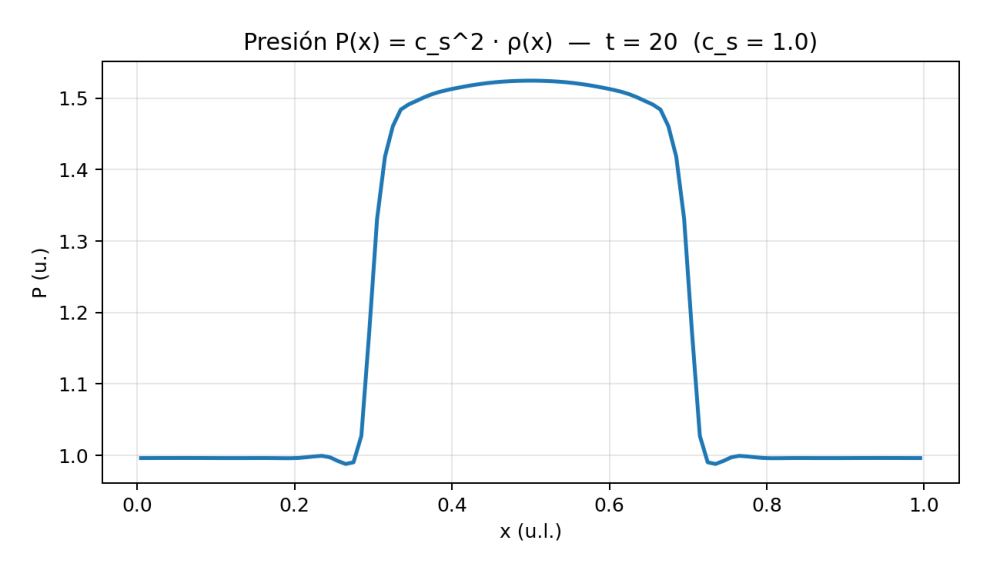

In [31]:
# Mostrar análisis de presión
img_pressure_path = '../results/problema1/pressure_t20.png'
if os.path.exists(img_pressure_path):
    img_pressure = mpimg.imread(img_pressure_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img_pressure)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Imagen de presión no encontrada.")



---

*Notebook generado para el análisis del Problema 1 - Onda Sonora*
